<a href="https://colab.research.google.com/github/niteen11/lagcc_data_analytics_micro_credential/blob/master/Unit%203%20-%20Python%20Advanced/Mini%20Project/COVID19_DATA_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID 19 Data Analysis

**Description:** This script will read the latest data from the New York Times' county-level COVID-19 database at https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv, filter the data for a chosen county in a chosen state, calculate the daily count of new cases and new deaths, print the most recent 28 days' worth of data for the selected county, and save the county's data for all dates to a comma-separated value (.csv) file on your computer. The printed data can be copied and pasted directly into a spreadsheet for further analysis and visualization.

**Note:** For information about the data, see https://github.com/nytimes/covid-19-data.

**Note:** After you have run the script one time in a given Anaconda environment, you may reduce the script's execution time by adding a `#` in front of `pip install pandas`. For example, `#pip install pandas` instead of `pip install pandas`. The `#` will tell Python to skip the code without running it.

# Task 1 : Environment Set up

Import all required libraries that are needed for data analysis

In [ ]:
#importing libraries that we need for data manipulation
#data visualation and graphical plotting

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from matplotlib import style


# Task 2 :  Data Collection

Use nytimes github repository as a data source to collect the covid 19 data in real time and ingest it into colab notebook for data anlysis purpose

In [ ]:
#importting raw data about covid-19 to work with 
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')

In [ ]:
#Prints table of raw data that shows the first 5 rows
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [ ]:
#Prints out how many rows and columns are in the data
df.shape

(37638, 5)

In [ ]:
#prints out all the columns in the dataset 
df.columns


Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

# Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)

Analyzing New York state data for Covid 19

In [ ]:
#makes a new subset table
#that shows data only for New York State since we want to
#work with Covid 19 data for New York State
ny_df = df[df['state']=='New York']

In [ ]:
#Prints table of raw data that shows the first 5 rows
ny_df.head()

,date,state,fips,cases,deaths
246,2020-03-01,New York,36,1,0
261,2020-03-02,New York,36,1,0
276,2020-03-03,New York,36,2,0
293,2020-03-04,New York,36,11,0
313,2020-03-05,New York,36,22,0


In [ ]:
#Prints out how many row and column are in the dataset
ny_df.shape

(684, 5)

In [ ]:
#prints out the last five row of the new york dataframe
ny_df.tail()

,date,state,fips,cases,deaths
37392,2022-01-09,New York,36,4136861,60083
37448,2022-01-10,New York,36,4194745,60162
37504,2022-01-11,New York,36,4244155,60428
37560,2022-01-12,New York,36,4299066,60638
37616,2022-01-13,New York,36,4361115,60876


In [ ]:
#first death in NY
#makes a new table called first_ny_deaths that shows 
#when the first death to covid happen and how many death happened 
first_ny_death = ny_df[ny_df['deaths']!=0]
first_ny_death.head()

,date,state,fips,cases,deaths
669,2020-03-14,New York,36,610,2
722,2020-03-15,New York,36,732,6
775,2020-03-16,New York,36,950,10
828,2020-03-17,New York,36,1375,18
882,2020-03-18,New York,36,2387,32


In [ ]:
#total number of cases
ny_df['cases'].max()

4361115

In [ ]:
# not a correct way of calculating total count bcoz data is cumulative
ny_df['cases'].sum()

953601238

Finding new covid 19 cases on daily basis (new cases added everyday)

In [ ]:
#new cases for NY
# type(ny_df['cases'])
#for loop is implemented to compare how many new
#cases there to the day before

newcase = []
previuos_case = 0
for index, row in ny_df.iterrows():
  current_case = row['cases']
  newcase_count = current_case - previuos_case
  previuos_case = current_case
  newcase.append(newcase_count)
  # print(newcase_count)

In [ ]:
ny_df['new_cases'] = newcase

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
ny_df.head(10)

,date,state,fips,cases,deaths,new_cases
246,2020-03-01,New York,36,1,0,1
261,2020-03-02,New York,36,1,0,0
276,2020-03-03,New York,36,2,0,1
293,2020-03-04,New York,36,11,0,9
313,2020-03-05,New York,36,22,0,11
338,2020-03-06,New York,36,44,0,22
369,2020-03-07,New York,36,89,0,45
404,2020-03-08,New York,36,106,0,17
440,2020-03-09,New York,36,142,0,36
478,2020-03-10,New York,36,173,0,31


In [ ]:
ny_df['new_cases'].sum()

4361115

In [ ]:
ny_cases = ny_df['cases']
ny_deaths = ny_df['deaths']
ny_dates = ny_df['date']
ny_new_cases = ny_df['new_cases']

In [ ]:
type(ny_new_cases)

pandas.core.series.Series

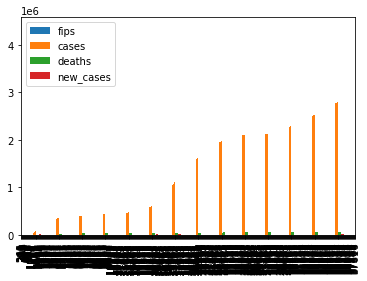

In [ ]:
ny_df.plot(kind='bar')

In [ ]:
fig = px.area(ny_df,x='date', y='cases', facet_col="state", facet_col_wrap=2)
fig = px.area(ny_df,x='deaths', y='cases', facet_col="state", facet_col_wrap=2)
fig.show()

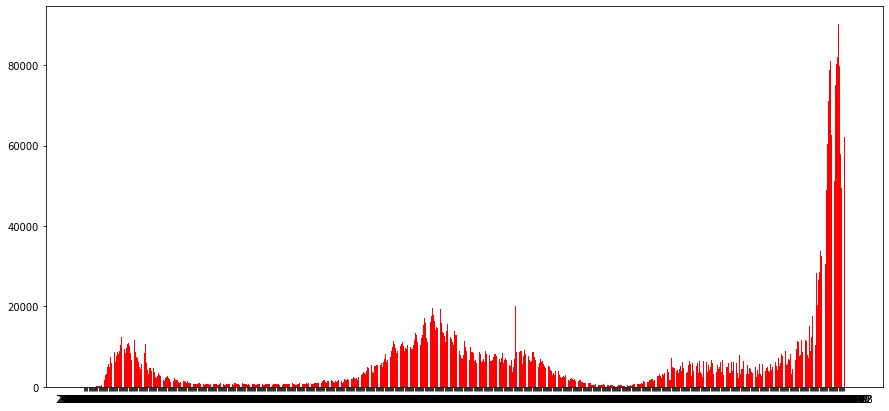

In [ ]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates, height=ny_new_cases, color='red')

plt.show()



In [ ]:
# setting the width variable with anchos to 0.5

#anchos = 0.5

# passing the .Figure function from plotly 

fig = go.Figure()

# assigning the x-axis and the y-axis for 'Total Ballot Count (Estimated)'
# this will be the graph in the 'front' showing the estimated ballot count
# an offset is introduced here, to make it more apparent
fig.add_trace(go.Bar(x = ny_df['date'],
                     y = ny_df['new_cases'],
                     offset = 0.0005,
                     #width = 0.5,
                     name = 'new cases'
                     ))

# the title is named here, and the size of the chart is set to 1280x1024
# font size is set to 30
fig.update_layout(title = "New Cases",
               barmode = "overlay",
               title_font_size = 30,
               width = 1280,
               height = 1024)
# X axis is updated to State
fig.update_xaxes(
                title_text = 'Date'
)
# Y axis is updated to 'Voter Eligible Population to Ballots Cast'
fig.update_yaxes(
                title_text = 'Count of new cases'
)
# How does the eligible population compare to the ballot count of each state?
# Thus, we can see which state had the greatest turnout rate as well. 

#represent changes from previous day



# Task4: Understand NY covid 19 data in last 30 days

In [ ]:
ny_cases_30 = ny_df['cases'][-31:-1]
ny_deaths_30 = ny_df['deaths'] [-31:-1]
ny_dates_30 = ny_df['date'][-31:-1]
ny_new_cases_30 = ny_df['new_cases'][-31:-1]

In [ ]:
# ny_dates_30

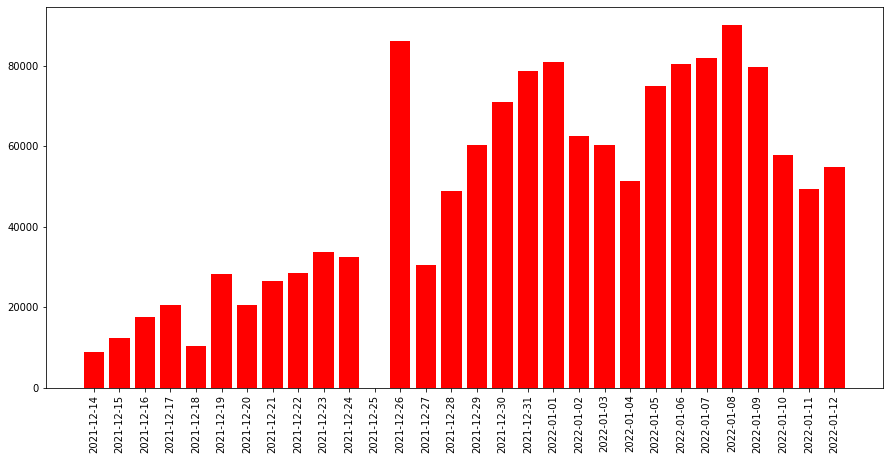

In [ ]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_new_cases_30, color='red')
plt.xticks(rotation=90)
plt.show()

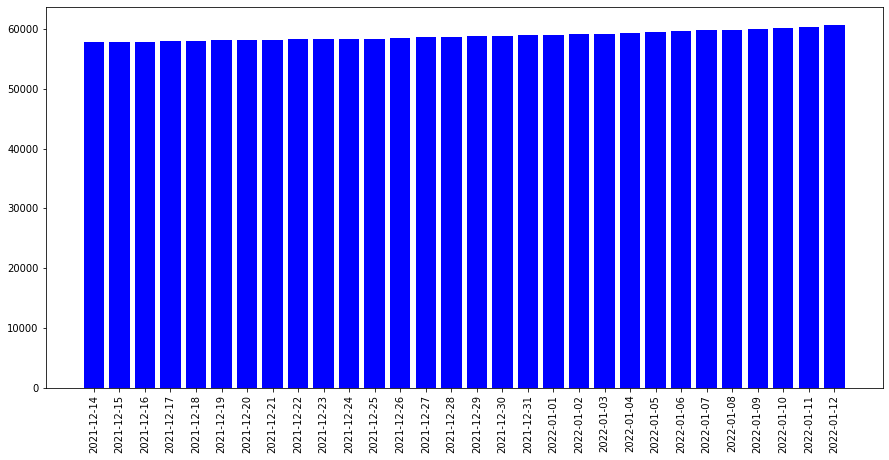

In [ ]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_deaths_30, color='blue')
plt.xticks(rotation=90)
plt.show()

# Comparing Covid 19 data with different states

Let's compare the Covid 19 cases after July for states: New York, California, Florida, Texas, Arizona

In [ ]:
states = ['New York', 'California','Florida', 'Texas','Arizona']

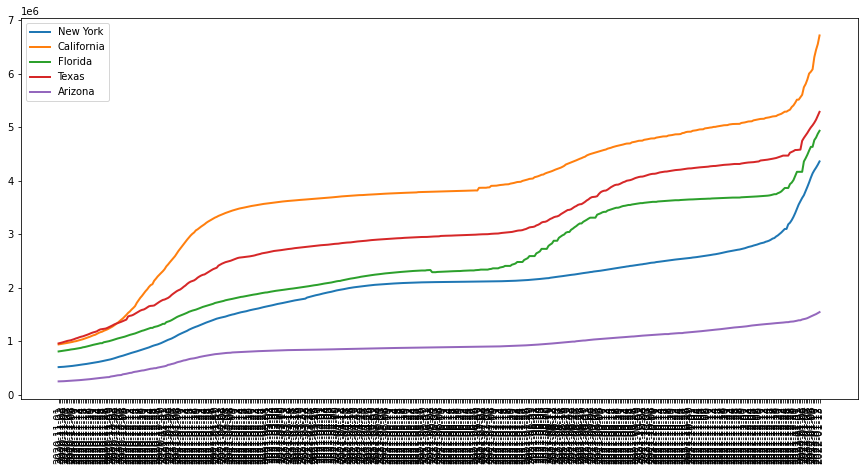

In [ ]:
plt.figure(figsize=(15,7))
for state in states:
  df_st = df[(df['state']==state) & (df['date']>='2020-11-01')]
  plt.plot(df_st['date'],
           df_st['cases'],
           linewidth=2
           )
  plt.xticks(rotation=90)
plt.legend(states)
plt.show()


In [ ]:
df_july = df[df.state.isin(states) & (df['date']>='2020-07-01')]

In [ ]:
dir(px.data)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'absolute_import',
 'carshare',
 'election',
 'gapminder',
 'iris',
 'tips',
 'wind']

In [ ]:
# Date is from july 2020 to Jan 2022
# Comparing 5 states 
# Arizona has less cases than California and Texas, Arizona has less people living there
# Even though California has more people than new york
# the slope is similar in New York with California and Texas

fig = px.area(df_july,
              x = 'date',
              y = 'cases',
              facet_col="state",
              facet_col_wrap=2)
fig.show()


# Conclusion

Below are the conclusions:



1.   Conclusion 1
     There was an aggressive slope when covid19 was first being logged and stored. People did not know how infectious the virus was. Death is not instant and takes a period of time for an infected to potentially die. This is represented in the lag between new cases and increase in cumulative deaths.
2.   Conclusion 2
    When looking at some other states such as Arizona, we see that while the amount of people living there is smaller than NY,CA,TX, and FL. The slope movement is relatively the same over a long period of time. This does not mean that the slope increase is the same, just that if cases are rising in the other states, AZ will experience an increase in cases as well.


